# Linear Regression Model

The goal of this analysis is to compare different combinations of variables to determine which subset of predictors creates the **best model** for predicting `lpsa` or `psa`, an antigen which elevanted in the presense of prostate cancer, using the **ProstateData.csv** dataset.

Table of Contenst:
- Setup
- Import Data
- Explore Data Analysis (EDA)
- Build Model
- Evaluate Model
- Model Equation

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats # Q_Q plot
from scipy.stats import ttest_ind # static test
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE

# from sklearn.preprocessing import LabelEncoder

In [3]:
conda list

# packages in environment at c:\Users\thaop\anaconda3\envs\DataScience:
Note: you may need to restart the kernel to use updated packages.

#
# Name                    Version                   Build  Channel
anaconda_prompt           1.1.0                haa95532_0  
asttokens                 3.0.0              pyhd8ed1ab_1    conda-forge
blas                      1.0                         mkl  
bottleneck                1.4.2           py313h2cb717b_0  
brotli-python             1.0.9           py313h5da7b33_9  
bzip2                     1.0.8                h2bbff1b_6  
ca-certificates           2024.12.31           haa95532_0  
colorama                  0.4.6              pyhd8ed1ab_1    conda-forge
comm                      0.2.2              pyhd8ed1ab_1    conda-forge
contourpy                 1.3.1           py313h214f63a_0  
cpython                   3.13.1          py313hd8ed1ab_105    conda-forge
cycler                    0.11.0             pyhd3eb1b0_0  
debugpy           

## Import Data

In [2]:
df = pd.read_csv('../data/ProstateData.csv')

## EDA

In [35]:
print('Shape: ', df.shape)
print('Columns: ', df.columns)
print(df.info())
print(df.describe())
df.head()

Shape:  (97, 10)
Columns:  Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa', 'train'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
 9   train    97 non-null     object 
dtypes: float64(5), int64(4), object(1)
memory usage: 7.7+ KB
None
          lcavol    lweight        age       lbph        svi        lcp  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean    1.350010   3.628943  63.865979   0.100356   0.216495  -0.179366  

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


Columns of `df`:
- **lcavol**: log(cancer volume)
- **lweight**: log(prostate weight)
- **age**: age
- **lbph**: log(begining prostate hyperplasia amount)
- **svi**: seminal vesicle invasion. This refers to a tumor infiltration orginating from external tumor cells. There are `0`s and `1`s to represent the 2 different types of **SVI**. 
- **lcp**: log(capsular penetration)
- **gleason**: Gleason score
- **pgg45**: percentage Gleason scores 4 or 5
- **lpsa**: log(prostate specific antigen)
- **train**: logical index used to differentiate train from test points. Consist of `T`s and `F`s.

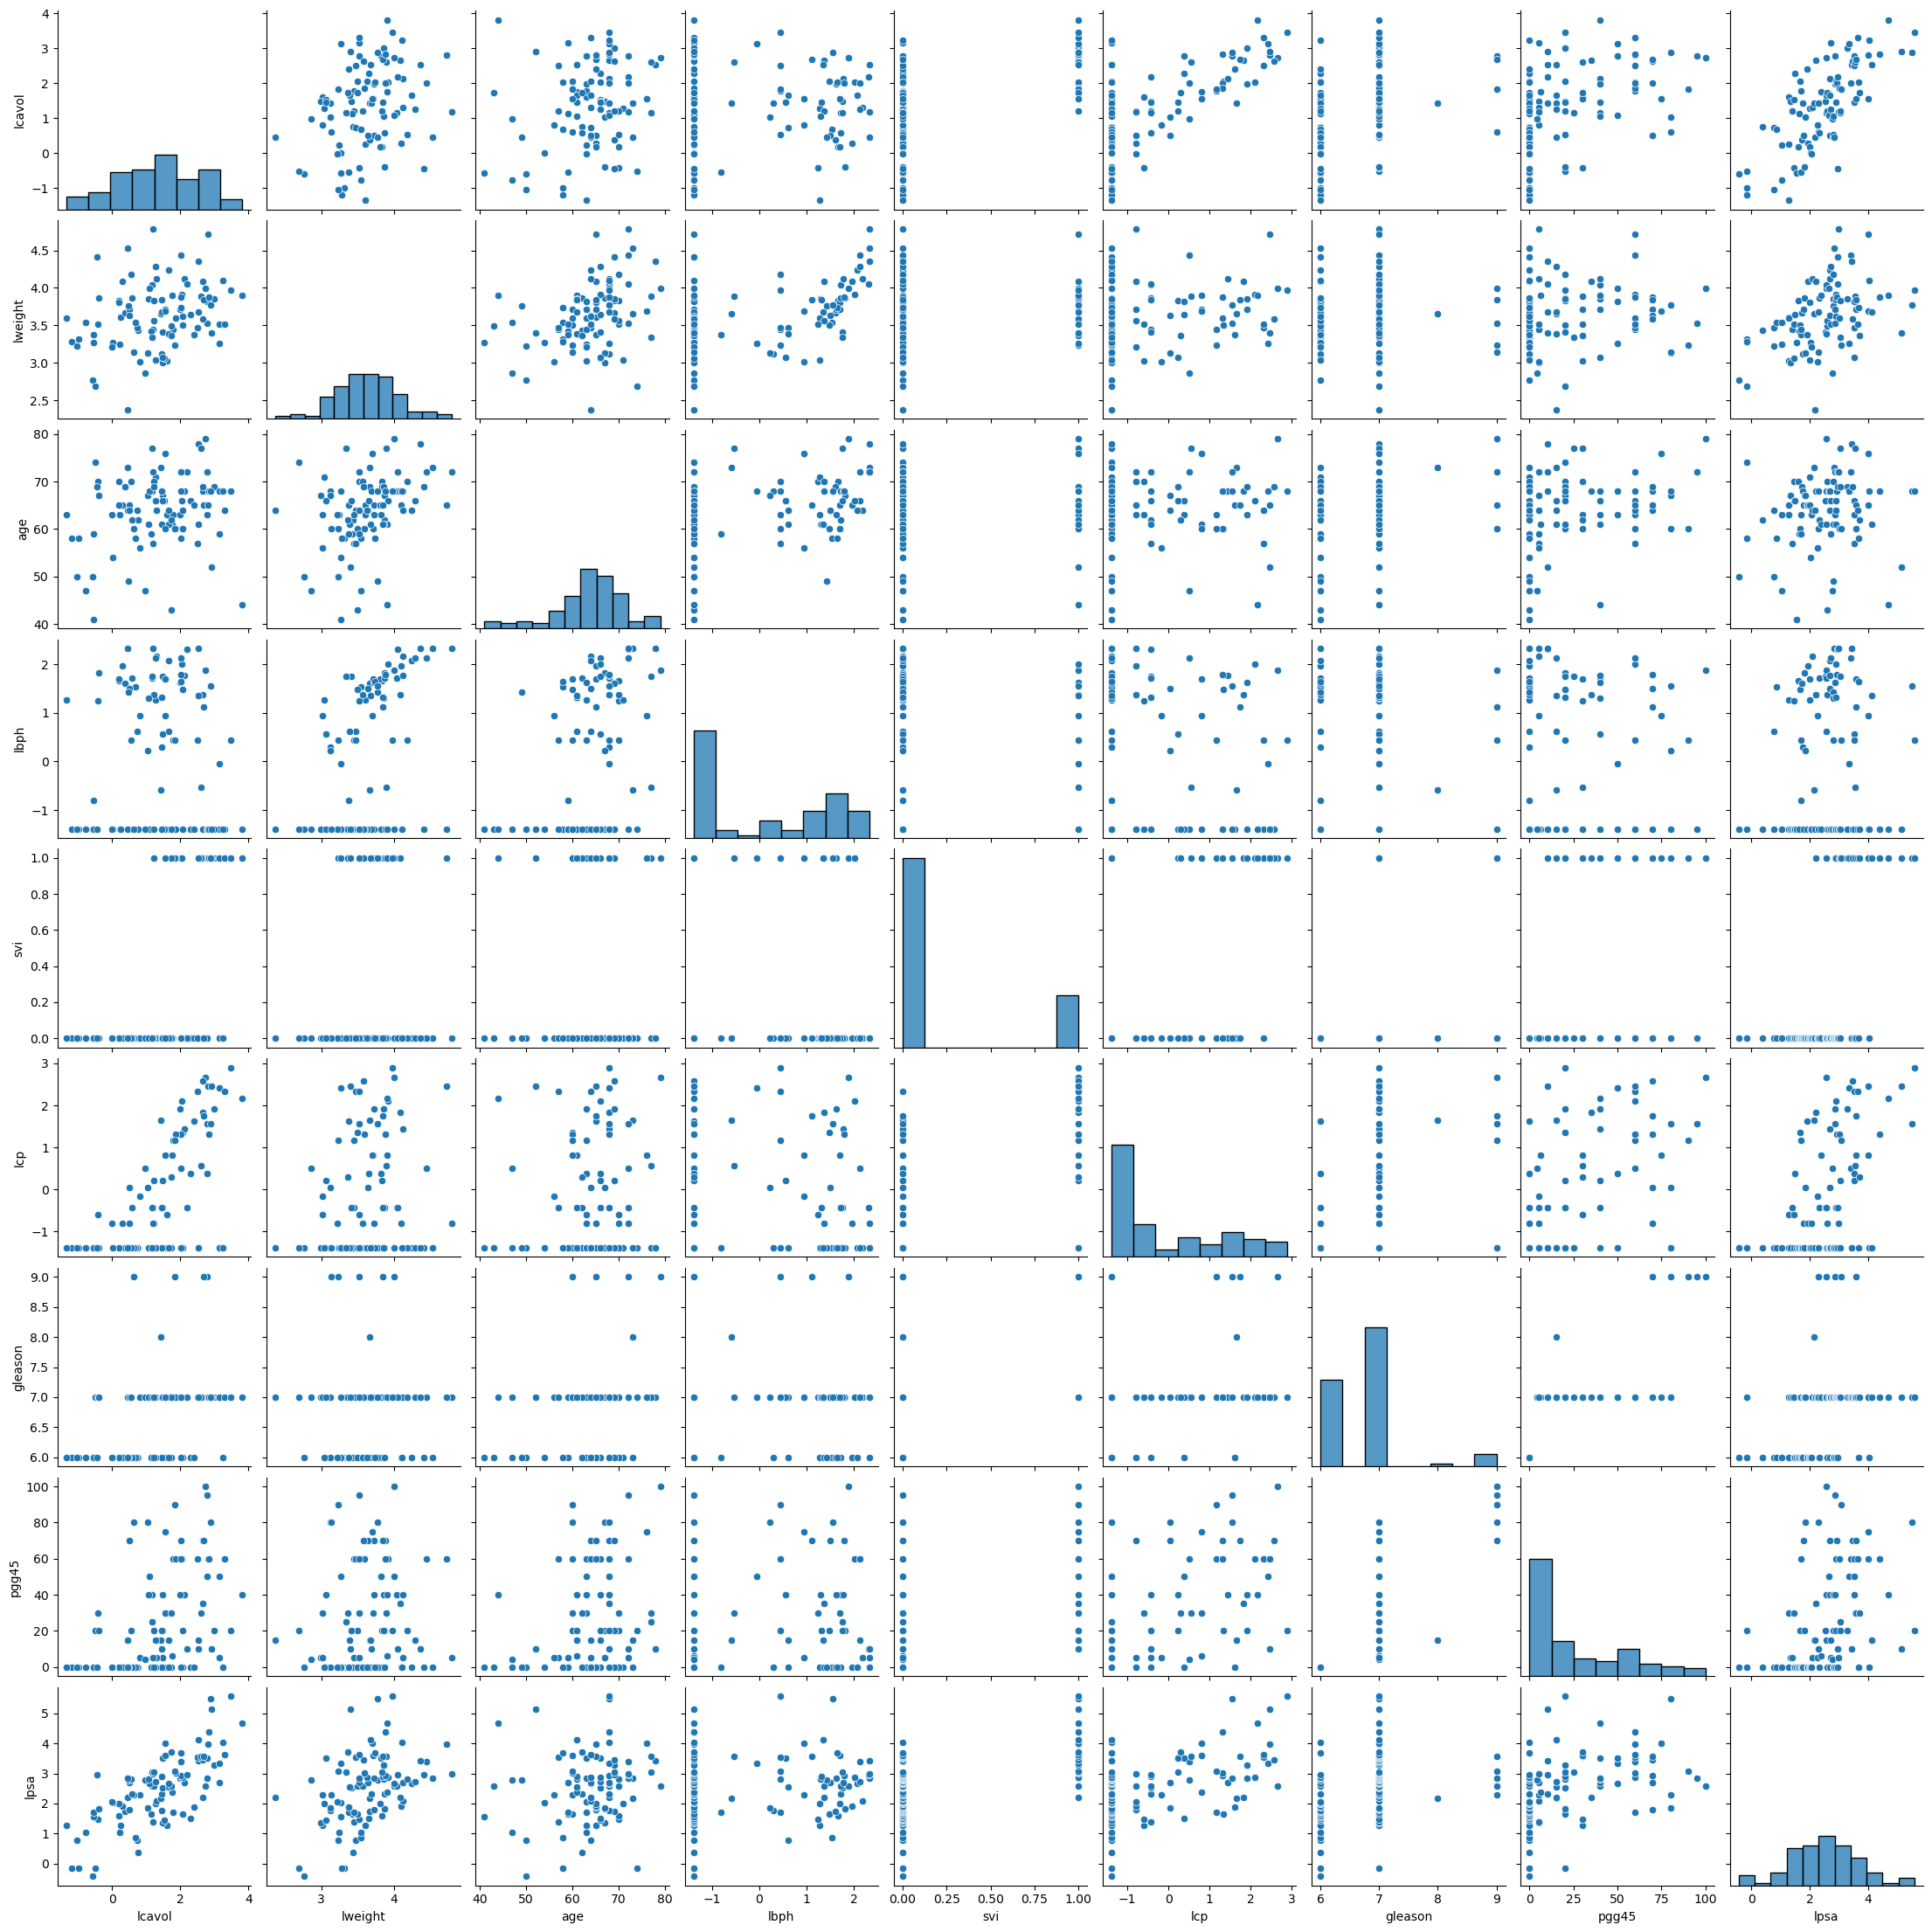

In [36]:
sns.pairplot(df)

### Missing Data

In [37]:
print(f'Number of missing data per column: \n{df.isnull().sum()}')
print(f'\nPercentage of missing data per column: \n{df.isnull().sum() / df.shape[0] * 100}')
print(f'\nTotal missing data: {df.isnull().sum().sum()}')

Number of missing data per column: 
lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

Percentage of missing data per column: 
lcavol     0.0
lweight    0.0
age        0.0
lbph       0.0
svi        0.0
lcp        0.0
gleason    0.0
pgg45      0.0
lpsa       0.0
train      0.0
dtype: float64

Total missing data: 0


### Categorical Data

In [38]:
print(f'Number of unique values in {df.svi.value_counts()}')
print(f'\nNumber of unique values in {df["train"].value_counts()}')

Number of unique values in svi
0    76
1    21
Name: count, dtype: int64

Number of unique values in train
T    67
F    30
Name: count, dtype: int64


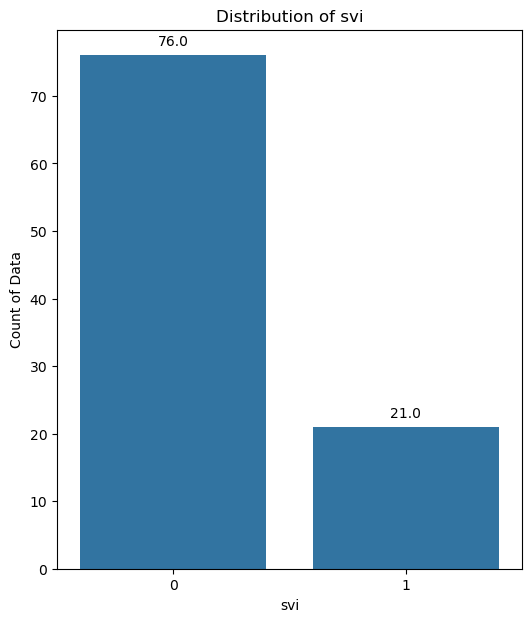

In [39]:
# Plot the distribution
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='svi', data=df)

plt.title('Distribution of svi')
plt.xlabel('svi')
plt.ylabel('Count of Data')

# Annotate the plot with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

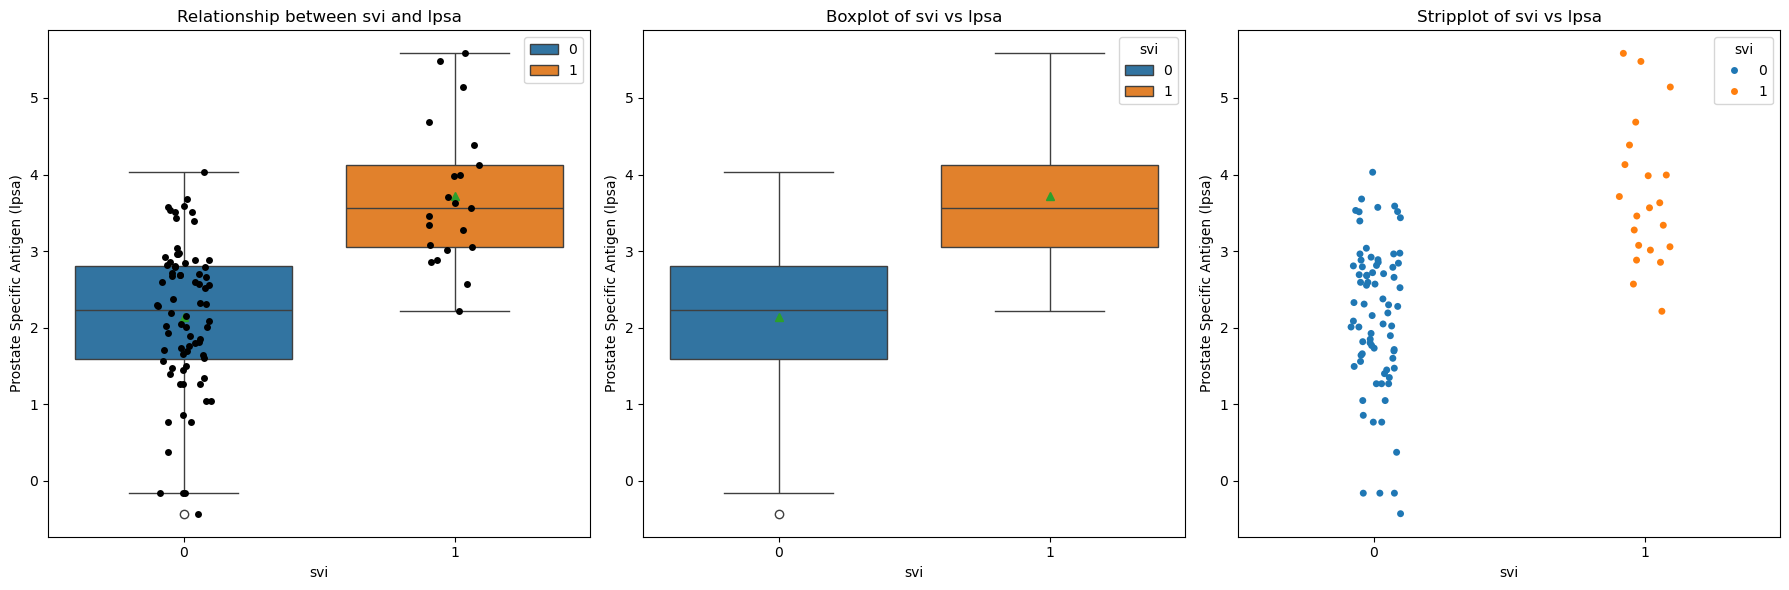

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# First subplot: Boxplot and Stripplot
sns.boxplot(x='svi', y='lpsa', data=df, hue='svi', showmeans=True, ax=axes[0])
sns.stripplot(x=df['svi'],y=df['lpsa'], jitter=True, color='black', ax=axes[0])
axes[0].set_title('Relationship between svi and lpsa')
axes[0].set_xlabel('svi')
axes[0].set_ylabel('Prostate Specific Antigen (lpsa)')

# Second subplot: Boxplot
sns.boxplot(x='svi', y='lpsa', data=df, hue='svi', showmeans=True, ax=axes[1])
axes[1].set_title('Boxplot of svi vs lpsa')
axes[1].set_xlabel('svi')
axes[1].set_ylabel('Prostate Specific Antigen (lpsa)')

# Third subplot: Stripplot
sns.stripplot(x='svi', y='lpsa', data=df, jitter=True, hue='svi', ax=axes[2])
axes[2].set_title('Stripplot of svi vs lpsa')
axes[2].set_xlabel('svi')
axes[2].set_ylabel('Prostate Specific Antigen (lpsa)')

plt.tight_layout() # To ensure that the subplots do not overlap
plt.show()

***Observations from the Relationship Boxplot between `svi` and `lpsa`***

**1. Difference Between Groups**:
    
The median line of the second group (`svi` = 1) lies outside the range of the first group (`svi` = 0), indicating a likely difference between the two groups.

**2. Group 1 (svi = 0)**:

- The median line of the box is slightly above the mean, indicating a slight skewness.
- The upper quartile (75th percentile) is slightly smaller than the lower quartile (25th percentile).
- The upper whisker is noticeably shorter than the lower whisker.
- Therefore, the distribution is negatively (left) skewed.

**3. Group 2 (svi = 1)**:

- The median line of the box is slightly below the mean, indicating a slight skewness.
- The upper quartile is slightly smaller than the lower quartile.
- The upper whisker is longer than the lower whisker.
- Therefore, the distribution is positively (right) skewed.

**4. Data Concentration**:

- Most data points are concentrated in the middle section of the boxes.
- The box length of the first group (`svi` = 0) is longer than that of the second group (`svi` = 1), indicating that the data in the first group is more dispersed than in the second group.

**5. Outliers**:

- There is one outlier located below the bottom whisker in the first group (`svi` = 0).
- There are no outliers in the second group (`svi` = 1).

***Interpreting the Relationship betweeen `svi` and `lpsa`:***

**1. Group 1 (svi = 0)**:

- **Distribution**: Negatively skewed with a larger interquartile range (IQR), indicating greater variability in `lpsa` values.
- **Outliers**: One outlier below the lower whisker.

**2. Group 2 (svi = 1)**:

- **Distribution**: Positively skewed with a smaller IQR, indicating more concentrated `lpsa` values.
- **Outliers**: No outliers.

**3. Comparison**:

- **Variability**: Group 1 shows greater variability in `lpsa` values compared to Group 2.
- **Central Tendency**: Group 1 tends towards higher `lpsa` values, while Group 2 tends towards lower `lpsa` values.

***Conclusion***

Seminal vesicle invasion (`svi`) is associated with distinct distributions of `lpsa` values. Group 1 (`svi` = 0) has more dispersed and higher `lpsa` values, while Group 2 (`svi` = 1) has more consistent and lower `lpsa` values.

In [41]:
# Summary Statistics for `svi`
print("Summary statistics for 'svi':")
df.groupby('svi')['lpsa'].describe()

Summary statistics for 'svi':


,count,mean,std,min,25%,50%,75%,max
svi,,,,,,,,
0,76.0,2.136592,0.964640,-0.430783,1.589077,2.234460,2.807892,4.029806
1,21.0,3.715360,0.925123,2.213754,3.056357,3.565298,4.129551,5.582932


#### Statistical Test

In [42]:
# Split data by 'svi' groups
group_0 = df[df['svi'] == 0]['lpsa']
group_1 = df[df['svi'] == 1]['lpsa']

# Perform t-test
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -6.857817059296514, P-value: 7.879066167295174e-08


The results of your t-test are:
- T-statistic: -6.8578
- P-value: 7.879 × 10⁻⁸ (essentially 0.00000007879)

Interpretation:

- P-value:
The p-value is extremely small (far below the common significance level of 0.05), indicating strong evidence against the null hypothesis.
This means there is a statistically significant difference in the lpsa values between the svi groups (0 and 1).

- T-statistic:
The negative value of the t-statistic suggests that the mean of the lpsa values for the group where svi = 0 is lower than the mean for the group where svi = 1.

- Conclusion:
There is a significant difference in lpsa values between the two groups of svi. Specifically, the group with svi = 1 has higher mean lpsa values compared to the group with svi = 0.

### Numerical Data
Displaying the *correlation matrix* between each numerical variables of **df**, which are **'lcavol'**, **'lweight'**, **'age'**, **'lbph'**, **'lcp'**, **'gleason'**, **'pgg45'**, and **'lpsa'**. Then displaying the variables on a heatmap.

##### Correlation Matrix

In [43]:
# Selecting the numerical variables:
cor = df[['lcavol','lweight','age','lbph', 'lcp','gleason','pgg45','lpsa']]

# Correlation Matrix
cor.corr()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.006999,0.077820,0.078460,0.179809
lcp,0.675310,0.164537,0.127668,-0.006999,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.548813,0.368987,0.422316,1.000000


##### Subplot Heatmap and Data Maksing Heatmap

This section introduces the concept of **data masking** in the context of heatmaps.
Data masking is a technique used to selectively highlight or hide certain data points based on specific conditions helping to focus attention on particular areas of interest or patterns within the dataset.

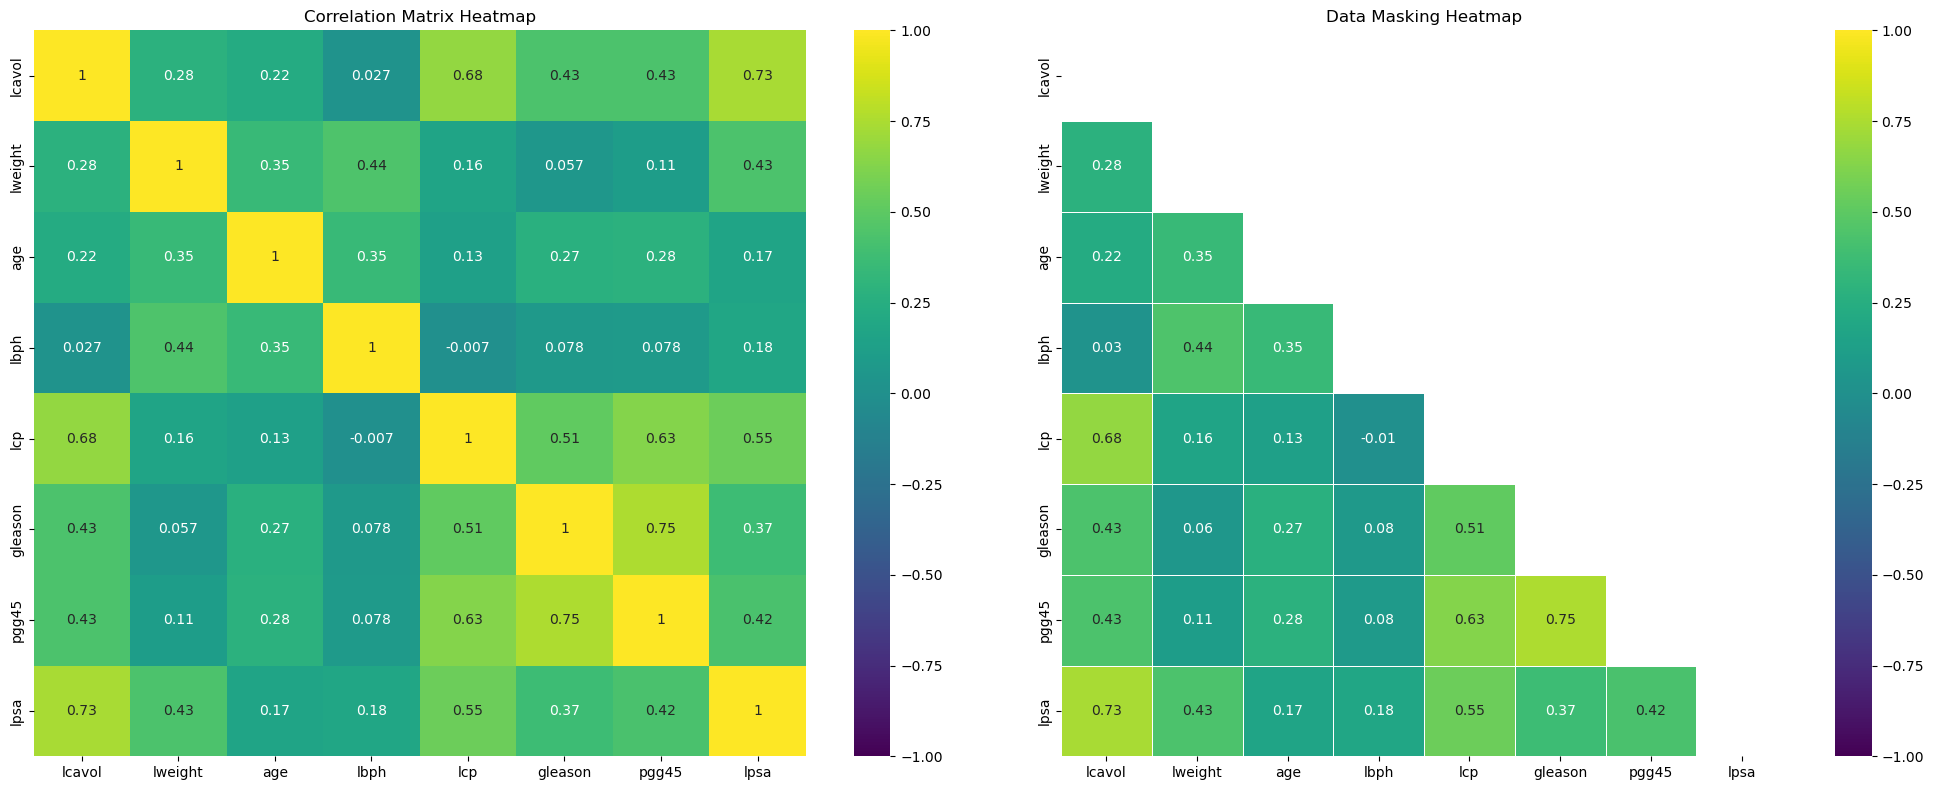

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Correlation Matrix Heatmap
sns.heatmap(data=cor.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap="viridis", ax=axes[0])
axes[0].set_title('Correlation Matrix Heatmap')

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(cor.corr(), dtype=bool))

# Data Masking Heatmap
sns.heatmap(cor.corr(), cmap='viridis', vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", square=True, linewidths=.5, mask=mask, ax=axes[1])
axes[1].set_title('Data Masking Heatmap')

plt.tight_layout()
plt.show()

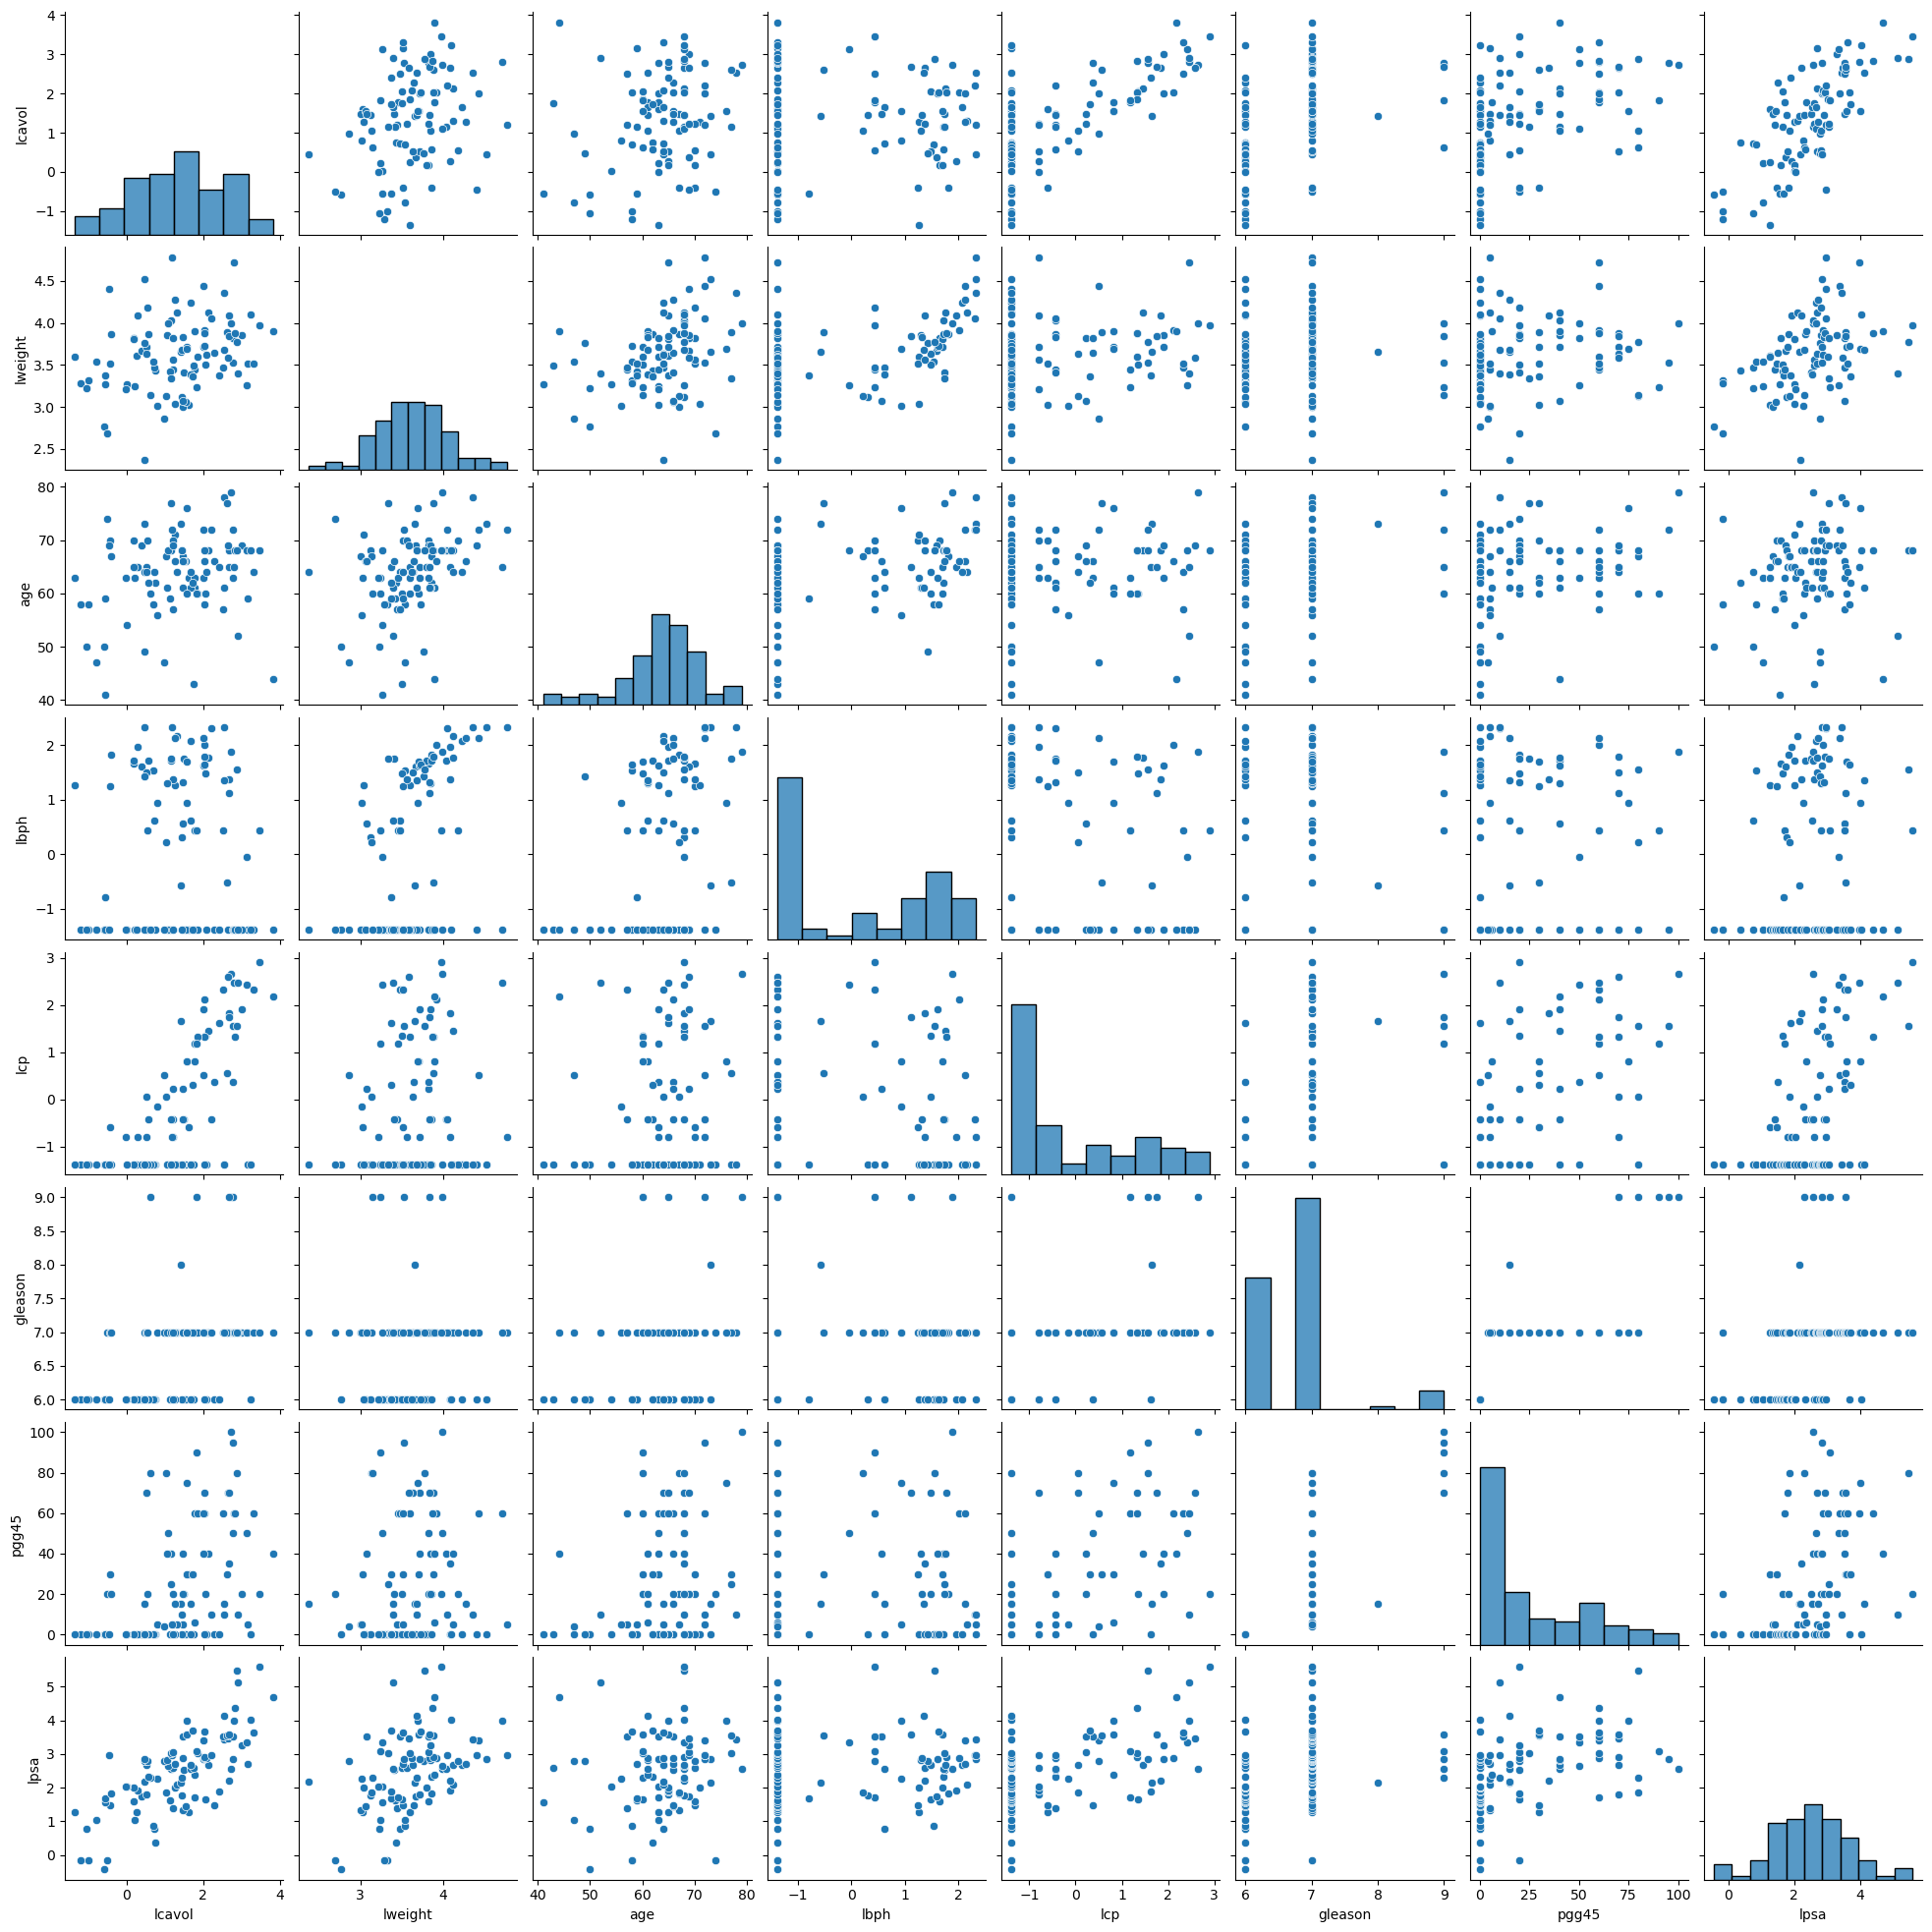

In [45]:
sns.pairplot(cor)

#### Normal Distribution with Quantile_Quantile Plot
Creating a **Quantile_Quantile Plot** to assess whether or not a set of data potentially came from some theoretical distribution.

Reading Sources:
[qqplot (Quantile-Quantile Plot) in Python](https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/)

#### Data Range

In [46]:
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"Range of {column}: {df[column].min()} to {df[column].max()}")

Range of lcavol: -1.347073648 to 3.821003607
Range of lweight: 2.374906 to 4.780383
Range of age: 41 to 79
Range of lbph: -1.38629436 to 2.32630162
Range of svi: 0 to 1
Range of lcp: -1.38629436 to 2.90416508
Range of gleason: 6 to 9
Range of pgg45: 0 to 100
Range of lpsa: -0.4307829 to 5.5829322


In [47]:
df['train'].describe()

count     97
unique     2
top        T
freq      67
Name: train, dtype: object

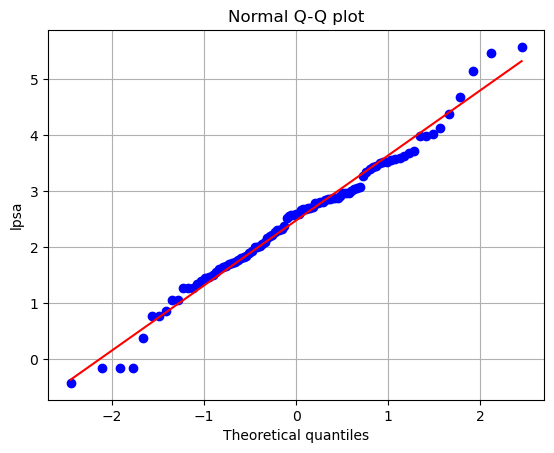

In [48]:
stats.probplot(df['lpsa'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('lpsa')
plt.grid(True)
plt.show()

## Split Data
Since the `df` has already had `train` columns for training (`T`) and testing (`F`) data, no need to manually split `df` into training and testing sets. However, **features** and **target** variables are still needed to be separated into `X` and `y`.


In [6]:
# Create training dataset
trainD = df[df['train'] == 'T'].drop(columns=['train'])
print(f'Number of trained data: {trainD.shape[0]}')
# Create testing dataset
testD = df[df['train'] == 'F'].drop(columns=['train'])
print(f'Number of tested data: {testD.shape[0]}')

Number of trained data: 67
Number of tested data: 30


In [50]:
trainD.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [51]:
testD.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319
14,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717
21,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228


### Define target and predictors

In [17]:
# Define the target (y) and predictors (X)
X = trainD.drop(columns=['lpsa'])  # Predictors
y = trainD['lpsa']  # Target

## Scale Data

In [18]:
# Scale the predictors (important for linear regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Build Model

### Recursive Feature Elimination

In [54]:
model = LinearRegression()

# Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=7)  # Select 4 features
rfe.fit(trainD.drop(columns=['lpsa']), trainD['lpsa'])

# Selected features
print("Selected features:", trainD.drop(columns=['lpsa']).columns[rfe.support_])

# Fit the best model
best_model = LinearRegression()
best_model.fit(trainD[trainD.drop(columns=['lpsa']).columns[rfe.support_]], trainD['lpsa'])

# Evaluate the model
predictions = best_model.predict(testD[testD.drop(columns=['lpsa']).columns[rfe.support_]])
rmse = root_mean_squared_error(testD['lpsa'], predictions)
r2 = r2_score(testD['lpsa'], predictions)
print("RMSE:", rmse)
print("R-squared:", r2)

Selected features: Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason'], dtype='object')
RMSE: 0.670643930513973
R-squared: 0.5715084468562919


***When `n_features_to_select = 4`***:
``` ruby
Selected features: Index(['lcavol', 'lweight', 'lbph', 'svi'], dtype='object')
RMSE: 0.6755235910315512
R-squared: 0.5652502822042023
```

## Installing mlxtend

In [55]:
@REM conda install mlxtend --channel conda-forge

^C

Note: you may need to restart the kernel to use updated packages.


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



### Model Building

#### Forward Selection

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Define the model (e.g., linear regression)
model = LinearRegression()

# Forward selection
sfs = SFS(model, k_features=7, forward=True, scoring='r2', cv=5)
sfs.fit(X, y)

# Print selected features
print("Selected features:", sfs.k_feature_names_)

Selected features: ('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45')


In [24]:
# Initialize the Linear Regression model
model = LinearRegression()

# Perform Forward Selection
sfs = SFS(
    model, 
    k_features=7,  # Number of features to select (you can adjust this)
    forward=True,  # Forward selection (set to False for backward selection)
    scoring='r2',  # Metric to evaluate model performance
    cv=5           # Cross-validation folds
)

# Fit the forward selection model
sfs.fit(X, y)

# Display the selected features
print("Selected features:", sfs.k_feature_names_)

Selected features: ('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45')


In [25]:

# Extract the selected features
X_selected = X[list(sfs.k_feature_names_)]

# Fit the final model
final_model = LinearRegression()
final_model.fit(X_selected, y)

# Display the coefficients
print("Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)

Coefficients: [ 0.57393039  0.61920883 -0.01947988  0.14442647  0.74178126 -0.20541699
  0.008945  ]
Intercept: 0.2590617470653944
